In [1]:
%pip install -r req.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3" # ignore annoying GPU warnings
from retinaface import RetinaFace
import matplotlib.pyplot as plt
import cv2
from augmentation import Data_Augmentation 

# Face Detection using Retina-Face
---

In [3]:
# init images
face0 = cv2.imread("images/face0.jpg")
face0 = cv2.cvtColor(face0, cv2.COLOR_BGR2RGB)

face1 = cv2.imread("images/face1.jpg")
face1 = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)

group0 = cv2.imread("images/group0.jpg")
group0 = cv2.cvtColor(group0, cv2.COLOR_BGR2RGB)

group1 = cv2.imread("images/group1.jpg")
group1 = cv2.cvtColor(group1, cv2.COLOR_BGR2RGB)

In [4]:
img = group0

In [5]:
faces = RetinaFace.detect_faces(img)

In [6]:
len(faces.keys()) # returns number of faces deteched

3

In [7]:
for key in faces:
    face = faces[key]
    facial_area = face["facial_area"]  # [x1, y1, x2, y2]
    x1, y1, x2, y2 = facial_area
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)

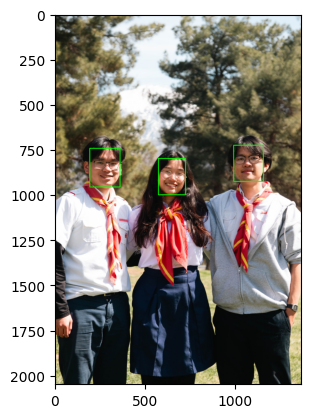

In [8]:
plt.imshow(img)
plt.show()

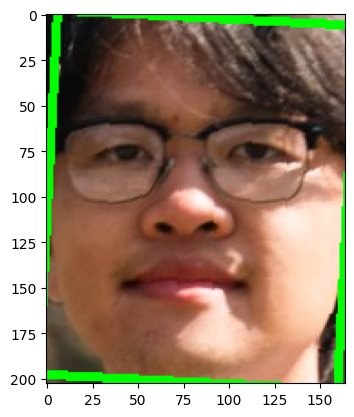

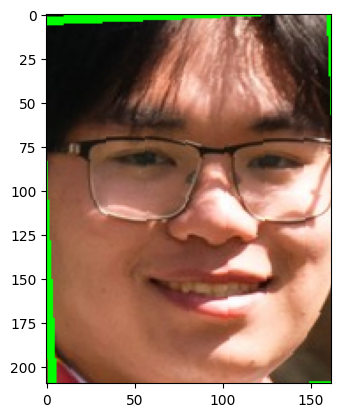

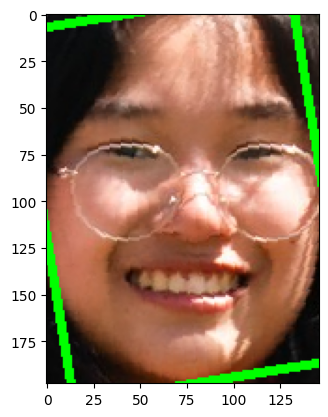

In [9]:
faces = RetinaFace.extract_faces(img, align=True)
for face in faces:
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    plt.imshow(face)
    plt.show()

# Data Augmentation
--- 

In [50]:
img_path = "images/headshots/will.jpeg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# brightness
brightened_img = Data_Augmentation.brightness(img, 100)
darkened_img = Data_Augmentation.brightness(img, -30)

# contrast (0 < factor <= 1 for low contrast) and (factor <= 1 for high contrast)
high_contrast_img = Data_Augmentation.contrast(img, 3)
low_contrast_img = Data_Augmentation.contrast(img, 0.4)

# gamma 


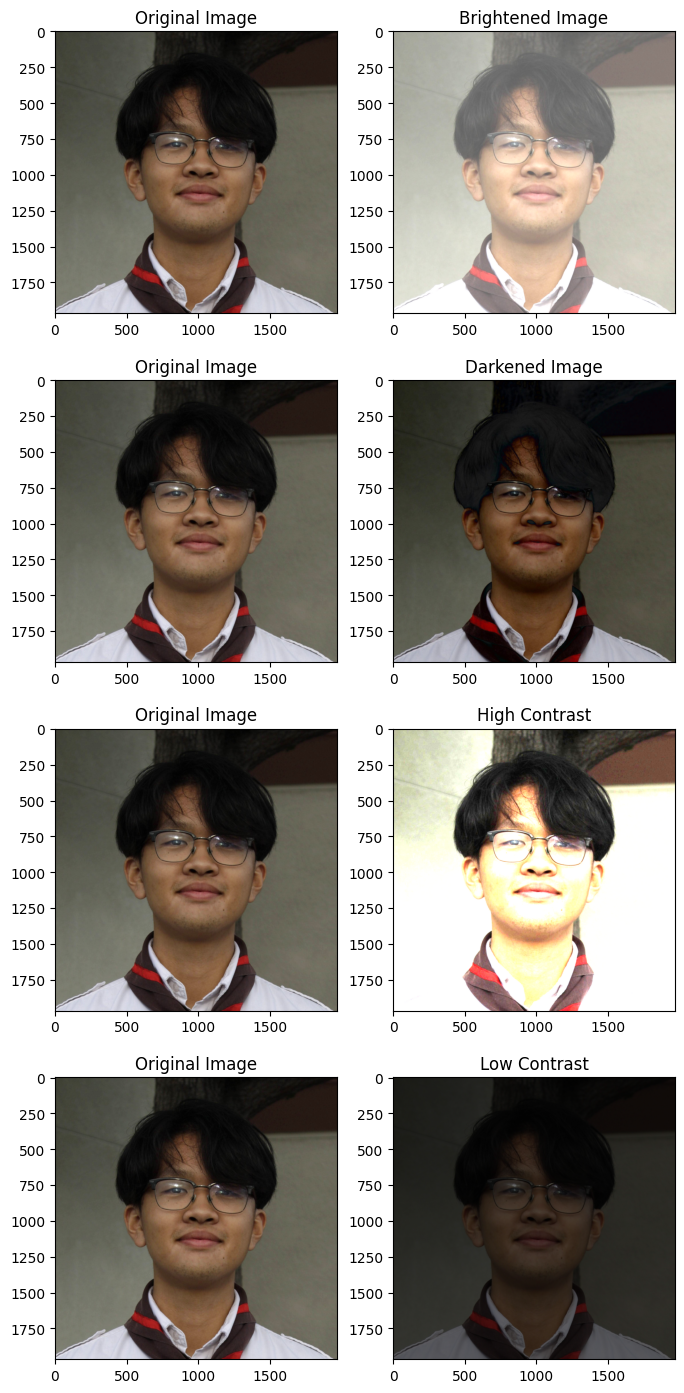

In [51]:
fig = plt.figure(figsize=(8,40))

ax1 = fig.add_subplot(921)
ax1.set_title('Original Image')
plt.imshow(img)

ax2 = fig.add_subplot(922)
ax2.set_title("Brightened Image")
plt.imshow(brightened_img)

ax3 = fig.add_subplot(923)
ax3.set_title('Original Image')
plt.imshow(img)

ax4 = fig.add_subplot(924)
ax4.set_title('Darkened Image')
plt.imshow(darkened_img)

ax5 = fig.add_subplot(925)
ax5.set_title('Original Image')
plt.imshow(img)

ax6 = fig.add_subplot(926)
ax6.set_title('High Contrast')
plt.imshow(high_contrast_img)

ax7 = fig.add_subplot(927)
ax7.set_title('Original Image')
plt.imshow(img)

ax8 = fig.add_subplot(928)
ax8.set_title('Low Contrast')
plt.imshow(low_contrast_img)